In [1]:
import numpy as np
import pandas as pd 
dataset = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/data%20science%20survey%20on%20Kaggle/kagglesurvey.csv")
dataset.head()

,Respondent,WorkToolsSelect,LanguageRecommendationSelect,EmployerIndustry,WorkAlgorithmsSelect
0,1,"Amazon Web services,Oracle Data Mining/ Oracle...",F#,Internet-based,"Neural Networks,Random Forests,RNNs"
1,2,"Amazon Machine Learning,Amazon Web services,Cl...",Python,Mix of fields,"Bayesian Techniques,Decision Trees,Random Fore..."
2,3,"C/C++,Jupyter notebooks,MATLAB/Octave,Python,R...",Python,Technology,"Bayesian Techniques,CNNs,Ensemble Methods,Neur..."
3,4,"Jupyter notebooks,Python,SQL,TensorFlow",Python,Academic,"Bayesian Techniques,CNNs,Decision Trees,Gradie..."
4,5,"C/C++,Cloudera,Hadoop/Hive/Pig,Java,NoSQL,R,Un...",R,Government,NaN


In [2]:
print("Dataset Before:")
dataset.info()

dataset = dataset.dropna()

print("Dataset After:")
dataset.info()

Dataset Before:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10153 entries, 0 to 10152
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Respondent                    10153 non-null  int64 
 1   WorkToolsSelect               7955 non-null   object
 2   LanguageRecommendationSelect  6534 non-null   object
 3   EmployerIndustry              8998 non-null   object
 4   WorkAlgorithmsSelect          7301 non-null   object
dtypes: int64(1), object(4)
memory usage: 396.7+ KB
Dataset After:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5991 entries, 0 to 10136
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Respondent                    5991 non-null   int64 
 1   WorkToolsSelect               5991 non-null   object
 2   LanguageRecommendationSelect  5991 non-null   object
 3   E

In [3]:
""" 
This method takes the column as parameter and returns the string containing all the
values that were separated by ',' and it also concats the strings like
'Amazon Web Services' to 'AmazonWebServices' to avoid any ambiguity
"""
def combineText(Column):
    text = []
    result = ""
    for entry in Column:
        text.append(str(entry).split(','))
    
    for item in text:
        for skill in item:
            skill = skill.replace(" ","")
            result += skill
            result += " "
            
    return result

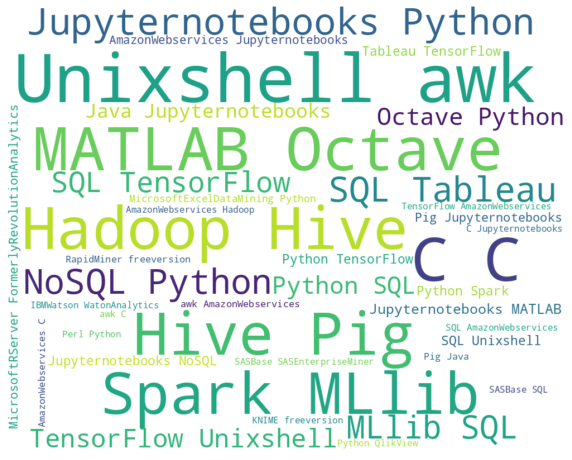

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tools=combineText(dataset["WorkToolsSelect"])

wordcloud = WordCloud(width = 1000, height = 800,
                     background_color ="white",
                     min_font_size = 15).generate(tools)

plt.figure(figsize = [10, 10])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [5]:
"""
This method takes string as input and returns dictonary in sorted order by keys.
input- "Python Python R Python"
output-{'Python':3, 'R':1}
"""
def countFrequency(text):
    frequency = {}
    text_list = text.split()

    for item in text_list:
        if item in frequency:
            frequency[item] += 1
        else:
            frequency[item] = 1

    sorted_dict = {}
    sorted_keys = sorted(frequency, key = frequency.get, reverse = True)

    for w in sorted_keys:
        sorted_dict[w] = frequency[w]

    return(sorted_dict)
""" 
Takes sorted dictionary as input and returns the list of respective keys and values as list of list
input-{'Python':3, 'R':1}
output-[['Python','R'],[3,1]]
"""
def CreateListForPlotting(sorted_dict):
    count = []
    skill = []
    for key, value in sorted_dict.items():
        skill.append(key)
        count.append(value)

    return [count,skill]  

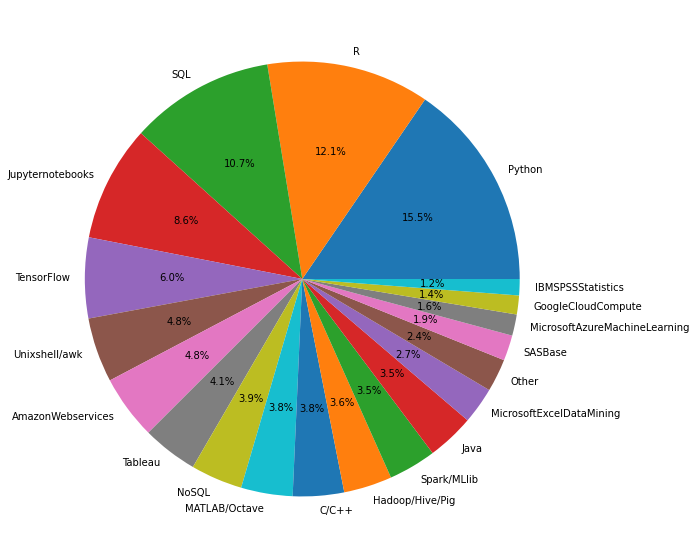

In [6]:
frequency_dict = countFrequency(tools)

result_list = CreateListForPlotting(frequency_dict)

frequency = result_list[0]
skills = result_list[1]
y = np.array(frequency[:20])
mylabels = skills[:20]

plt.figure(figsize = [10, 10])
plt.pie(y, labels = mylabels,autopct='%1.1f%%',labeldistance=1.07)
plt.show() 

In [8]:
print(dataset["LanguageRecommendationSelect"].value_counts())

Python      3729
R           1554
SQL          223
C/C++/C#     122
Matlab       113
Scala         64
Java          51
SAS           44
Other         42
Julia         20
Stata         17
Haskell       10
F#             2
Name: LanguageRecommendationSelect, dtype: int64


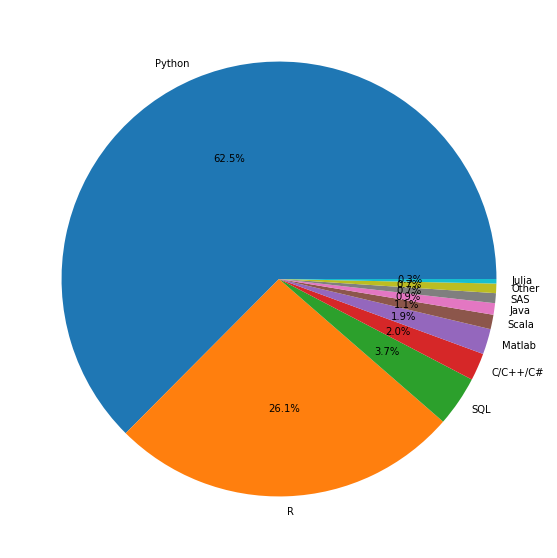

In [9]:
language = dataset['LanguageRecommendationSelect'].value_counts().keys().tolist()
counts = dataset['LanguageRecommendationSelect'].value_counts().tolist()

y = np.array(counts[:10])
mylabels = language[:10]

plt.figure(figsize=[10, 10])
plt.pie(y, labels = mylabels,autopct='%1.1f%%',labeldistance=1.07)
plt.show() 

In [10]:
print(dataset['EmployerIndustry'].value_counts())

Technology                          1158
Academic                             991
Financial                            631
Mix of fields                        566
Other                                564
Internet-based                       426
Government                           313
CRM/Marketing                        230
Manufacturing                        207
Telecommunications                   198
Insurance                            195
Retail                               166
Pharmaceutical                        98
Non-profit                            88
Military/Security                     82
Hospitality/Entertainment/Sports      78
Name: EmployerIndustry, dtype: int64


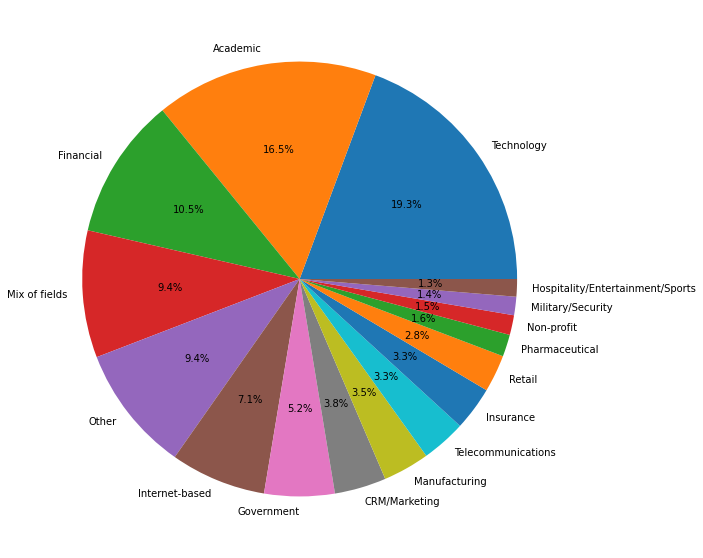

In [11]:
Industry = dataset['EmployerIndustry'].value_counts().keys().tolist()
Industry_count = dataset['EmployerIndustry'].value_counts().tolist()

y = np.array(Industry_count)
mylabels = Industry
plt.figure(figsize=[10, 10])
plt.pie(y, labels = mylabels,autopct='%1.1f%%',labeldistance=1.07)
plt.show() 

In [12]:
technology= dataset["LanguageRecommendationSelect"][dataset["EmployerIndustry"]=="Technology"]
print(technology.head())

2     Python
9          R
18    Python
22    Python
23    Python
Name: LanguageRecommendationSelect, dtype: object


In [13]:
print(technology.value_counts())

Python      826
R           210
SQL          31
C/C++/C#     20
Scala        19
Matlab       19
Java         15
Other         6
SAS           5
Julia         3
Stata         2
Haskell       2
Name: LanguageRecommendationSelect, dtype: int64


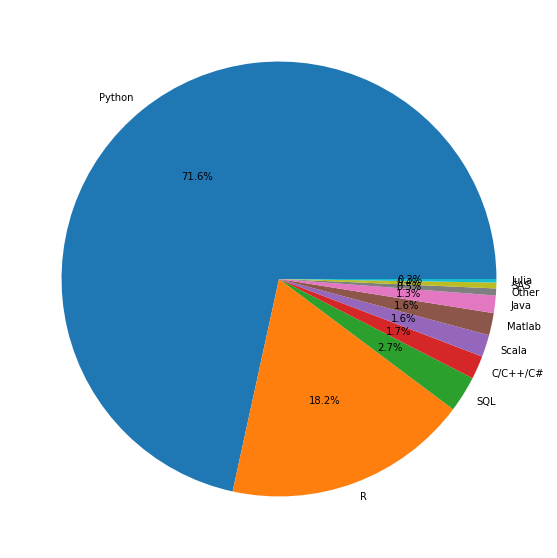

In [14]:
LanguageUsed = technology.value_counts().keys().tolist()
Language_count = technology.value_counts().tolist()

y = np.array(Language_count[:10])
mylabels = LanguageUsed[:10]

plt.figure(figsize=[10, 10])
plt.pie(y, labels = mylabels,autopct='%1.1f%%',labeldistance=1.07)
plt.show() 

In [15]:
academics= dataset["LanguageRecommendationSelect"][dataset["EmployerIndustry"]=="Academic"]
print(academics.head())

3     Python
10    Python
12    Python
32       SAS
52         R
Name: LanguageRecommendationSelect, dtype: object


In [16]:
print(academics.value_counts())

Python      576
R           274
Matlab       45
C/C++/C#     39
SQL          13
Java         11
Other         9
Julia         7
Scala         6
SAS           4
Stata         4
Haskell       2
F#            1
Name: LanguageRecommendationSelect, dtype: int64


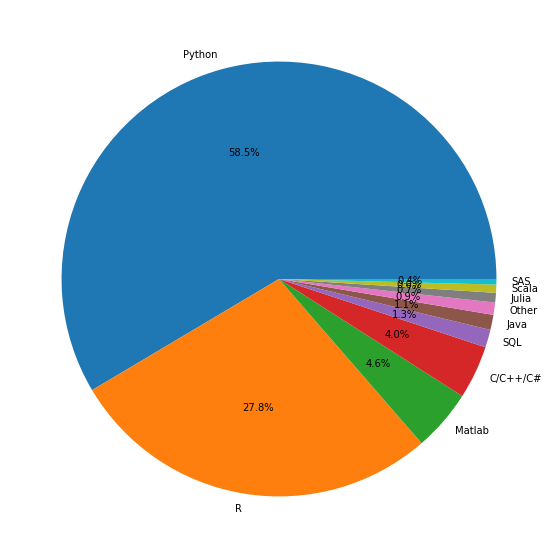

In [17]:
LanguageUsed = academics.value_counts().keys().tolist()
Language_count = academics.value_counts().tolist()

y = np.array(Language_count[:10])
mylabels = LanguageUsed[:10]

plt.figure(figsize=[10, 10])
plt.pie(y, labels = mylabels,autopct='%1.1f%%',labeldistance=1.07)
plt.show()

In [18]:
dataset["IndustryLanguage"]=dataset["LanguageRecommendationSelect"]+ "-" +dataset["EmployerIndustry"]
print(dataset["IndustryLanguage"].head())

0        F#-Internet-based
1     Python-Mix of fields
2        Python-Technology
3          Python-Academic
6    Python-Internet-based
Name: IndustryLanguage, dtype: object


In [19]:
print(dataset["IndustryLanguage"].value_counts())

Python-Technology            826
Python-Academic              576
Python-Financial             386
Python-Mix of fields         359
Python-Other                 335
                            ... 
Julia-Military/Security        1
Haskell-Military/Security      1
Java-Military/Security         1
Haskell-Insurance              1
SQL-Military/Security          1
Name: IndustryLanguage, Length: 152, dtype: int64


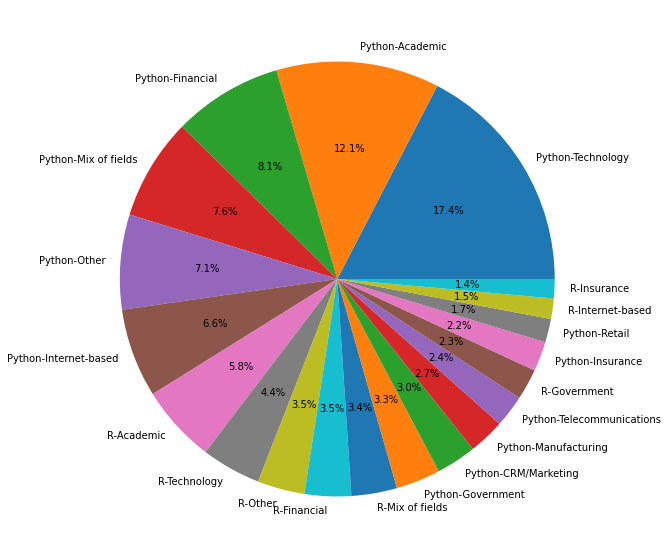

In [20]:
IndustryLanguage = dataset['IndustryLanguage'].value_counts().keys().tolist()
IndustryLanguage_count = dataset['IndustryLanguage'].value_counts().tolist()

y = np.array(IndustryLanguage_count[:20])
mylabels = IndustryLanguage[:20]

plt.figure(figsize=[10, 10])
plt.pie(y, labels = mylabels,autopct='%1.1f%%',labeldistance=1.07)
plt.show() 

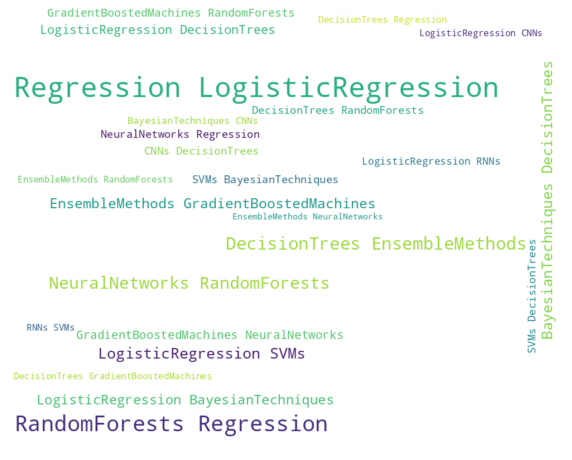

In [21]:
algorithms = combineText(dataset["WorkAlgorithmsSelect"])

wordcloud = WordCloud(width = 1000, height = 800,
                     background_color = "white",
                     min_font_size = 15).generate(algorithms)

plt.figure(figsize=[10, 10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()